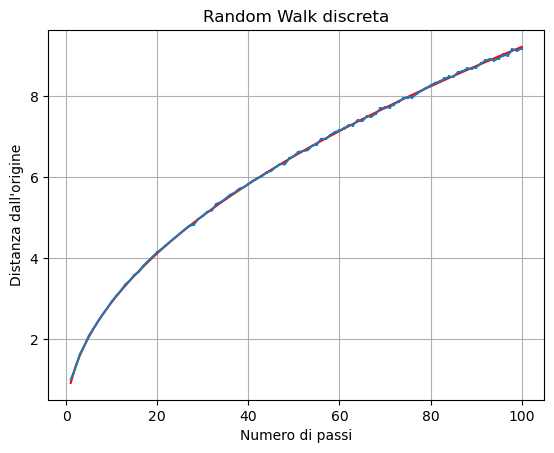

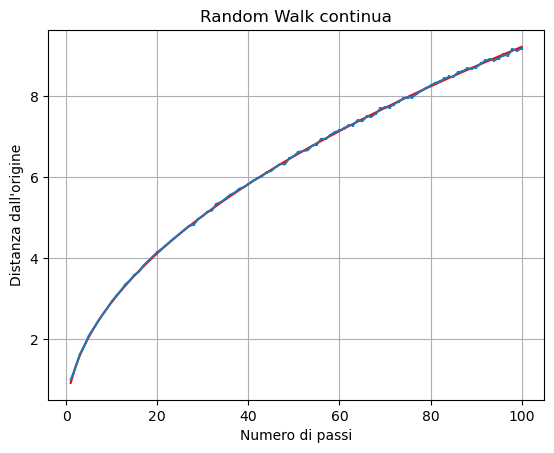

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Funzione per il fit k*sqrt(n)
def sqrt_fit(n, k):
    return k * np.sqrt(n)

def read_data_from_file(filename):
    # Inizializza due liste vuote per memorizzare i dati
    n = []
    dist_discr = []
    err_discr = []
    dist_cont = []
    err_cont = []

    # Apre il file e legge i dati riga per riga
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        for line in file:
            # Divide ogni riga in due numeri e li aggiunge alle rispettive liste
            values = line.split()
            n.append(float(values[0]))
            dist_discr.append(float(values[1]))
            err_discr.append(float(values[2]))
            dist_cont.append(float(values[3]))
            err_cont.append(float(values[4]))
            
    return n, dist_discr, err_discr, dist_cont, err_cont

# Chiamata alla funzione per leggere i dati dal file
n, dist_discr, err_discr, dist_cont, err_cont = read_data_from_file("dati.dat")

# Esegue il fit dei dati discreti
popt_discr, pcov_discr = curve_fit(sqrt_fit, n, dist_discr)

# Esegue il fit dei dati continui
popt_cont, pcov_cont = curve_fit(sqrt_fit, n, dist_cont)

plt.errorbar(n, np.array(dist_discr), yerr=np.array(err_discr))
plt.plot(n, sqrt_fit(n, *popt_discr), color='red', label='Fit: k * sqrt(n)')
plt.title('Random Walk discreta')
plt.xlabel('Numero di passi')
plt.ylabel('Distanza dall\'origine')
plt.grid(True)
plt.show()

plt.errorbar(n,np.array(dist_cont),yerr=np.array(err_cont))
plt.plot(n, sqrt_fit(n, *popt_cont), color='red', label='Fit: k * sqrt(n)')
plt.title('Random Walk continua')
plt.xlabel('Numero di passi')
plt.ylabel('Distanza dall\'origine')
plt.grid(True)
plt.show()